In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/pyramid_scheme.csv')
data

,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
0,1,3500,2,21,1000,-16500
1,2,3500,2,26,1000,-21500
2,3,3500,2,23,1000,-18500
3,4,3500,3,12,1000,-4000
4,5,3500,2,12,1000,-7500
...,...,...,...,...,...,...
495,496,3500,5,12,1000,3000
496,497,3500,3,8,1000,0
497,498,3500,2,10,1000,-5500
498,499,3500,4,21,1000,-9500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        500 non-null    int64
 1   cost_price        500 non-null    int64
 2   profit_markup     500 non-null    int64
 3   depth_of_tree     500 non-null    int64
 4   sales_commission  500 non-null    int64
 5   profit            500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [4]:
import numpy as np
print(data.isna().sum())

Unnamed: 0          0
cost_price          0
profit_markup       0
depth_of_tree       0
sales_commission    0
profit              0
dtype: int64


In [5]:
n = 500 #no.of nodes
max_edges = n*(n-1) # max edges that can be drawn
print("The maximum number of edges that can be drawn: ",max_edges)

The maximum number of edges that can be drawn:  249500


In [7]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.4 MB/s eta 0:00:00


**Graph Construction:**

A directed graph G is created by assuming connections between individuals based on their depth_of_tree. If an individual has a depth greater than 1, we connect them to someone from the previous level.
The connection is weighted by their profit_markup.

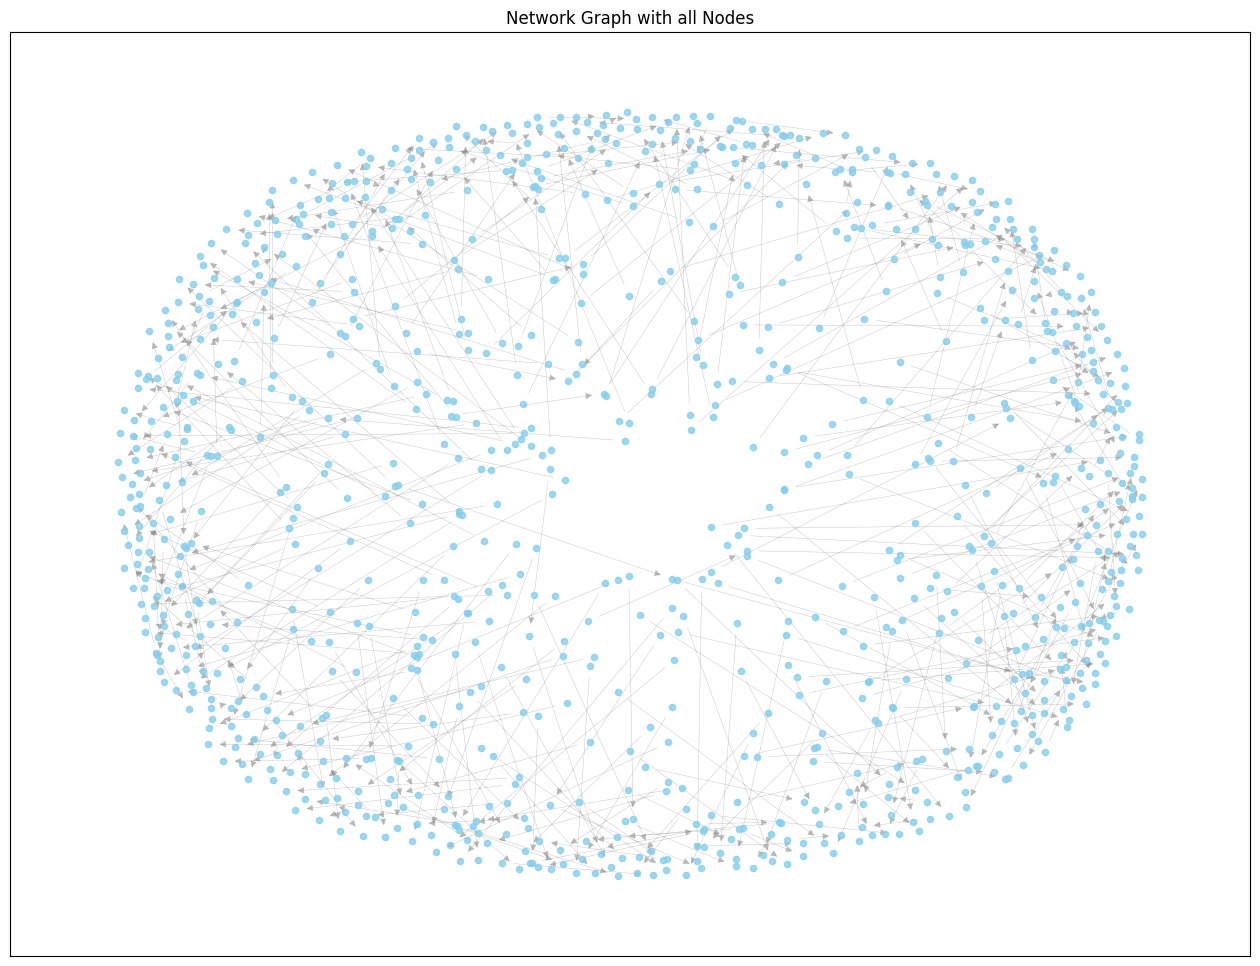

In [8]:
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

# Initialize the directed graph
G = nx.DiGraph()

# Add all nodes to the graph
for i, row in data.iterrows():
    node_label = f"Person {i} (Depth {row['depth_of_tree']})"
    G.add_node(node_label)

# Add edges based on depth_of_tree and profit_markup
for i, row in data.iterrows():
    if row['depth_of_tree'] > 1:  # Connect individuals based on depth_of_tree
        from_node = f"Person {i-1} (Depth {row['depth_of_tree']-1})"
        to_node = f"Person {i} (Depth {row['depth_of_tree']})"
        G.add_edge(from_node, to_node, weight=float(row['profit_markup']))

# Visualize the graph using Pyvis
nt = Network(height='800px', width='100%', bgcolor='white', font_color='black')

# Convert NetworkX graph to Pyvis format
nt.from_nx(G)

# Customize Pyvis visualization
nt.force_atlas_2based()  # Use the Force Atlas layout for better node spacing
nt.set_edge_smooth('continuous')  # Smooth edges
nt.repulsion(node_distance=200)  # Set node repulsion distance

# Set options to minimize controls
options = """
var options = {
  "physics": {
    "enabled": false
  },
  "manipulation": {
    "enabled": false
  },
  "layout": {
    "hierarchical": {
      "enabled": false
    }
  }
}
"""
nt.set_options(options)

# Save the Pyvis graph as an HTML file
html_file = 'network_graph.html'
nt.save_graph(html_file)

# Display the saved HTML file in Google Colab
display(HTML(html_file))

# Visualize with Matplotlib
plt.figure(figsize=(16, 12))  # Increase figure size for better visibility
pos = nx.spring_layout(G, k=0.2, iterations=50)  # Spring layout

# Draw nodes and edges using Matplotlib
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5, edge_color='gray')

# Turn off labels for cleaner visualization
# nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

plt.title("Network Graph with all Nodes")
plt.show()


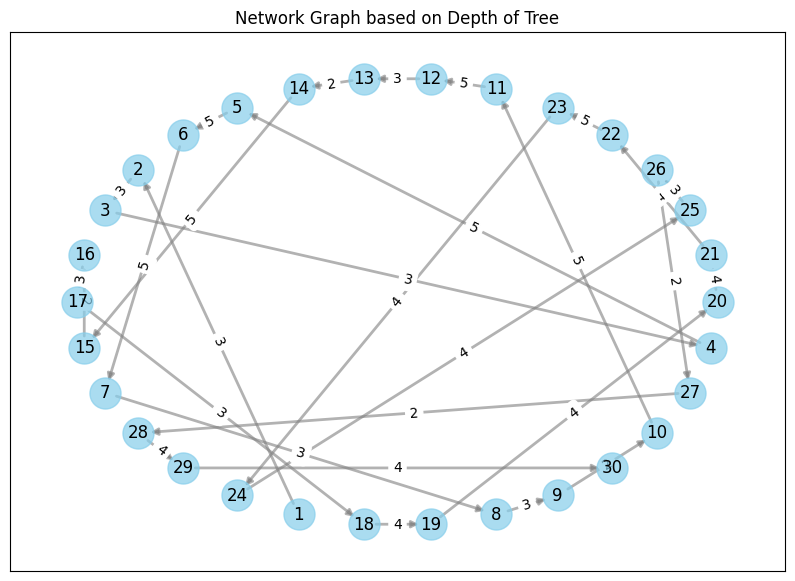

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
# For each row, assume a directed connection from higher depth to lower depth
for i, row in data.iterrows():
    # Assuming 'depth_of_tree' indicates some hierarchical connection
    if row['depth_of_tree'] > 1:  # We assume depth of tree > 1 indicates a connection
        # Randomly connecting individuals based on their depth
        G.add_edge(row['depth_of_tree'] - 1, row['depth_of_tree'], weight=row['profit_markup'])

# Visualizing the network graph
plt.figure(figsize=(10, 7))

# Position nodes using a spring layout (force-directed)
pos = nx.circular_layout(G)

# Draw the nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Add edge weights as labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.title("Network Graph based on Depth of Tree")
plt.show()

#weight-profit markup
#nodes-connected based on their hierarchical depth (depth_of_tree) levels

Descriptive Statistical Analysis

Density,
Average Distance,
Connectivity,
Transitivity,
Degree Centralization,

In [10]:
# 1. Density
density = nx.density(G)
print(f"Density: {density}")

# 2. Average Distance
if nx.is_strongly_connected(G):
    average_distance = nx.average_shortest_path_length(G)
else:
    average_distance = float('inf')  # Graph is not strongly connected
print(f"Average Distance: {average_distance}")

# Handle infinite average distance
if average_distance == float('inf'):
    print("The graph is not strongly connected; average distance is undefined.")

# 3. Connectivity
strong_connectivity = list(nx.strongly_connected_components(G))  # Convert to a list
connectivity = len(strong_connectivity)  # Count the number of strongly connected components
print(f"Number of Strongly Connected Components: {connectivity}")

# 4. Transitivity
transitivity = nx.transitivity(G.to_undirected())  # Convert to undirected for transitivity
print(f"Transitivity: {transitivity}")

# 5. Degree Centralization
degree_centrality = nx.degree_centrality(G)
max_degree = max(degree_centrality.values())
degree_centralization = sum(max_degree - v for v in degree_centrality.values()) / (len(G) - 1) / (len(G) - 2)
print(f"Degree Centralization: {degree_centralization}")


Density: 0.03333333333333333
Average Distance: inf
The graph is not strongly connected; average distance is undefined.
Number of Strongly Connected Components: 30
Transitivity: 0
Degree Centralization: 8.493290300662476e-05


**MOTIF ANALYSIS**

Unlike the above global analysis, the motif can analyze the network from the micro‐level. As a typical, local, and functionalized frequent subgraph, motifs can represent local information of the network and have strong statistical significance.

1.   Motif analysis is used to explore the microstructural features of the interpersonal network to explore the micro-operational model of the finance flow network.

  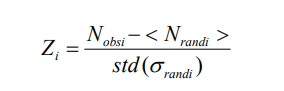

2.   Nobsi is the number of occurrences of the subgraph in the observed network,
<Nrandi> is the expected number of times the subgraph is in the random network, and ( ) randi std standard deviation. Two aspects are considered when evaluating the motif:
(1) The frequency of the
motif appearing in the random network is less than a certain threshold P . It is generally considered that the P value should be less than 0.01.
(2) The number of motifs in the observation network is greater than a certain threshold K . The K value takes different values due to the consideration of
the researchers. It is generally considered that the K value should be greater than
3. When the above conditions are satisfied, the higher the Z value, the more significant the motif


Number of nodes: 30
Number of edges: 29
Directed Motifs of Size 2:
Motif: ((20, 21),), Count: 1
Motif: ((19, 20),), Count: 1
Motif: ((21, 22),), Count: 1
Motif: ((25, 26),), Count: 1
Motif: ((24, 25),), Count: 1
Motif: ((26, 27),), Count: 1
Motif: ((22, 23),), Count: 1
Motif: ((23, 24),), Count: 1
Motif: ((11, 12),), Count: 1
Motif: ((10, 11),), Count: 1
Motif: ((12, 13),), Count: 1
Motif: ((13, 14),), Count: 1
Motif: ((14, 15),), Count: 1
Motif: ((5, 6),), Count: 1
Motif: ((4, 5),), Count: 1
Motif: ((6, 7),), Count: 1
Motif: ((2, 3),), Count: 1
Motif: ((1, 2),), Count: 1
Motif: ((3, 4),), Count: 1
Motif: ((16, 17),), Count: 1
Motif: ((15, 16),), Count: 1
Motif: ((17, 18),), Count: 1
Motif: ((7, 8),), Count: 1
Motif: ((28, 29),), Count: 1
Motif: ((27, 28),), Count: 1
Motif: ((29, 30),), Count: 1
Motif: ((18, 19),), Count: 1
Motif: ((8, 9),), Count: 1
Motif: ((9, 10),), Count: 1


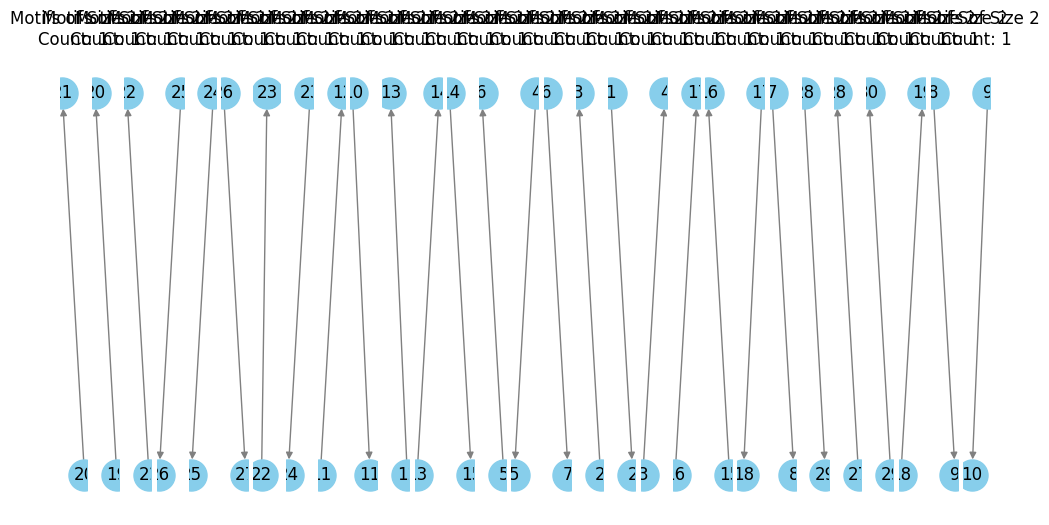


Directed Motifs of Size 3:
Motif: ((20, 21), (21, 22)), Count: 1
Motif: ((19, 20), (20, 21)), Count: 1
Motif: ((18, 19), (19, 20)), Count: 1
Motif: ((21, 22), (22, 23)), Count: 1
Motif: ((24, 25), (25, 26)), Count: 1
Motif: ((25, 26), (26, 27)), Count: 1
Motif: ((23, 24), (24, 25)), Count: 1
Motif: ((26, 27), (27, 28)), Count: 1
Motif: ((22, 23), (23, 24)), Count: 1
Motif: ((11, 12), (12, 13)), Count: 1
Motif: ((10, 11), (11, 12)), Count: 1
Motif: ((9, 10), (10, 11)), Count: 1
Motif: ((12, 13), (13, 14)), Count: 1
Motif: ((13, 14), (14, 15)), Count: 1
Motif: ((14, 15), (15, 16)), Count: 1
Motif: ((5, 6), (6, 7)), Count: 1
Motif: ((4, 5), (5, 6)), Count: 1
Motif: ((3, 4), (4, 5)), Count: 1
Motif: ((6, 7), (7, 8)), Count: 1
Motif: ((1, 2), (2, 3)), Count: 1
Motif: ((2, 3), (3, 4)), Count: 1
Motif: ((15, 16), (16, 17)), Count: 1
Motif: ((16, 17), (17, 18)), Count: 1
Motif: ((17, 18), (18, 19)), Count: 1
Motif: ((7, 8), (8, 9)), Count: 1
Motif: ((28, 29), (29, 30)), Count: 1
Motif: ((27, 

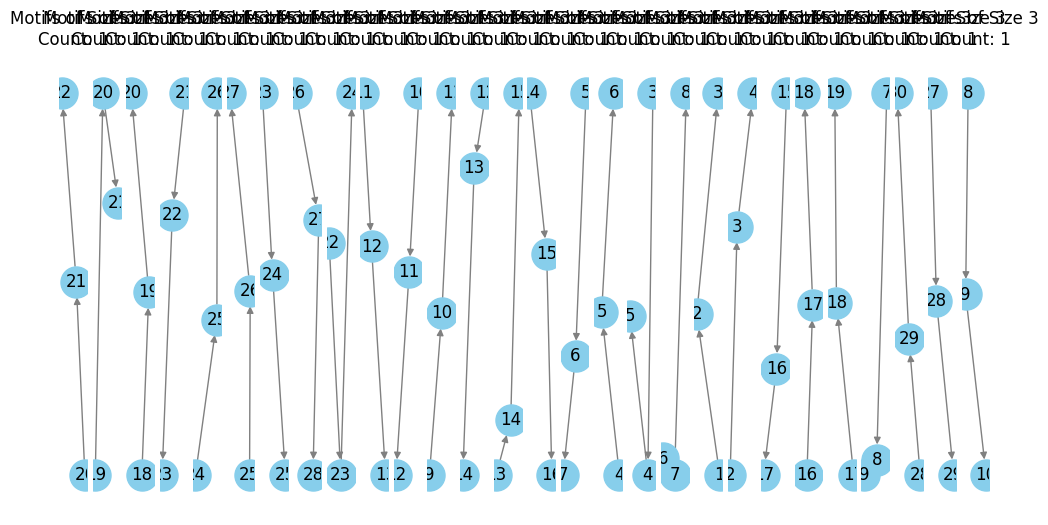

In [11]:
'''
Definition of a Motif: A motif is a small, recurring, and significant subgraph pattern within a larger graph.
For example, in directed graphs, a motif could be a simple pair of nodes connected by an edge, or a triplet of nodes forming a directed cycle.

Counting Occurrences: Counting motifs involves identifying how many times each unique motif appears in the graph.
This can be done for various sizes (e.g., pairs of nodes, triplets of nodes, etc.).

Function Implementation: A function that counts motifs typically goes through the following steps:
  Generate all possible combinations of nodes of a specified size.
  For each combination, create a subgraph and check its structure.
  Store and count the occurrences of each unique motif.
'''
from itertools import combinations

# Function to count directed motifs
def count_motifs(g, size=2):
    motifs_count = {}
    # Generate all combinations of nodes of the specified size
    for nodes in combinations(g.nodes(), size):
        subgraph = g.subgraph(nodes)
        # Check if the subgraph has the appropriate number of edges
        if len(subgraph.edges()) == size - 1:  # Adjusted for size-2 motifs
            motif = tuple(sorted(subgraph.edges()))  # Create a unique representation of the motif
            if motif in motifs_count:
                motifs_count[motif] += 1
            else:
                motifs_count[motif] = 1
    return motifs_count

# Check if the graph has nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Analyze motifs of size 2 and 3
directed_motifs_size_2 = count_motifs(G, size=2)
directed_motifs_size_3 = count_motifs(G, size=3)

# Function to draw each motif
def draw_motifs(motifs_count, title):
    plt.figure(figsize=(12, 6))
    num_motifs = len(motifs_count)
    if num_motifs == 0:
        print(f"No motifs found for {title}.")
        return

    for i, (motif, count) in enumerate(motifs_count.items(), 1):
        plt.subplot(1, num_motifs, i)
        motif_graph = nx.DiGraph()  # Directed graph for motif
        motif_graph.add_edges_from(motif)
        nx.draw(motif_graph, with_labels=True, node_color="skyblue", edge_color="grey", node_size=500)
        plt.title(f"{title}\nCount: {count}")
    plt.show()

# # Display the motifs and their counts for size 2
# print("Directed Motifs of Size 2:")
# if not directed_motifs_size_2:
#     print("No size-2 motifs found.")
# else:
#     for motif, count in directed_motifs_size_2.items():
#         print(f'Motif: {motif}, Count: {count}')

# # Display the motifs and their counts for size 3
# print("\nDirected Motifs of Size 3:")
# if not directed_motifs_size_3:
#     print("No size-3 motifs found.")
# else:
#     for motif, count in directed_motifs_size_3.items():
#         print(f'Motif: {motif}, Count: {count}')
# Display the motifs and their counts for size 2
print("Directed Motifs of Size 2:")
for motif, count in directed_motifs_size_2.items():
    print(f'Motif: {motif}, Count: {count}')
draw_motifs(directed_motifs_size_2, "Motifs of Size 2")

# Display the motifs and their counts for size 3
print("\nDirected Motifs of Size 3:")
for motif, count in directed_motifs_size_3.items():
    print(f'Motif: {motif}, Count: {count}')
draw_motifs(directed_motifs_size_3, "Motifs of Size 3")

In [ ]:
#Inference from Motif Analysis
'''
Directed Motifs of Size 2
  Unique Connections: The 24 distinct size-2 motifs suggest that every connection between two financial entities is unique and direct.
  This implies a one-to-one relationship in transactions, which could indicate:
  Direct Transfers: Each pair of nodes may represent a direct transfer of funds. For example, if node 20 is a supplier and node 21 is a retailer, the edge could represent payments made from the retailer to the supplier.
  Limited Redundancy: The lack of parallel edges suggests that funds are not being rerouted through multiple channels unnecessarily, indicating a streamlined transaction process.
Directed Motifs of Size 3
Sequential Transactions: The 27 distinct size-3 motifs, each representing a sequence of transactions, highlight a structured flow of funds through multiple entities. This can be interpreted as:
Pathways of Cash Flow: The sequences imply that transactions are likely occurring in a set order, potentially following a sales process (e.g., from manufacturer to distributor to retailer) or a financial hierarchy (e.g., department budget allocations).
Cascading Effects: This flow structure may indicate cascading effects, where a change in one transaction could impact subsequent transactions in the chain. For instance, a delay in payment from node 21 to node 22 could affect the financial health of node 22 and subsequently influence its transaction with node 23.
4. Hierarchical Financial Structure
Implications of a Hierarchical Network: The motif analysis reflects a possible hierarchical financial structure where:
Top-Down Funding: Higher nodes (e.g., corporate headquarters) may allocate resources downwards to lower nodes (e.g., departments or subsidiaries), supporting a centralized financial strategy.
Accountability and Traceability: The clear pathways in the motifs facilitate accountability, as each financial flow can be traced back to its source, enabling better oversight and risk management.
5. Operational Efficiency and Risk Management
Streamlined Operations: The motifs indicate operational efficiency within the financial flows, with each transaction clearly defined and executed. This can lead to reduced costs and faster processing times.
Risk Exposure: Understanding these pathways allows for better identification of risk exposure within the network. For example, if node 21 experiences financial difficulties, it could disrupt the flow to node 22 and beyond, highlighting the need for contingency planning.
6. Strategic Insights
Resource Allocation: The motif structure can inform strategic decisions on resource allocation, identifying key financial entities that play central roles in the network.
Investment Decisions: Analysis of these flows can guide investment decisions, indicating which nodes are critical for maintaining healthy financial dynamics within the overall network.
'''

**The Exponential Random Graph Model (ERGM)**

Output()

Output()

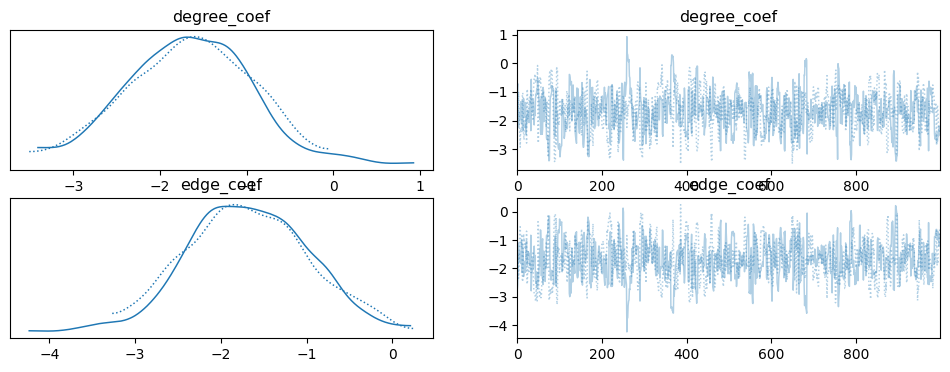

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
degree_coef -1.674  0.698  -3.064   -0.480      0.031    0.022     521.0   
edge_coef   -1.685  0.689  -2.821   -0.251      0.030    0.023     534.0   

             ess_tail  r_hat  
degree_coef     490.0   1.01  
edge_coef       448.0   1.00  


In [ ]:
import networkx as nx
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# Define the network
G = nx.DiGraph()
for _, row in data.iterrows():
    if row['depth_of_tree'] > 1:
        G.add_edge(row['depth_of_tree'] - 1, row['depth_of_tree'])

# Convert to adjacency matrix
adj_matrix = nx.to_numpy_array(G)
num_nodes = adj_matrix.shape[0]

# Define ERGM model in PyMC
with pm.Model() as ergm_model:
    # Prior for edge parameter (density term)
    edge_coef = pm.Normal("edge_coef", mu=0, sigma=1)

    # Degree distribution term: tendency to form nodes with similar degree
    degree_coef = pm.Normal("degree_coef", mu=0, sigma=1)

    # Linear combination of parameters to calculate logit probabilities for edges
    logit_p = edge_coef * adj_matrix.sum(axis=1) + degree_coef * np.square(adj_matrix).sum(axis=1)

    # Likelihood: binary adjacency matrix following a Bernoulli distribution
    edges = pm.Bernoulli("edges", logit_p=logit_p, observed=adj_matrix)

    # Sample from the posterior
    trace = pm.sample(1000, tune=500, target_accept=0.9, return_inferencedata=True)

# Analyze posterior results
az.plot_trace(trace)
plt.show()

# Display summary of posterior distributions
print(az.summary(trace))


In [ ]:
'''
INFERENCE FROM ERGM
1. Edge Coefficient (edge_coef):
A positive value here would suggest that connections across hierarchical depths (e.g., nodes in higher depth levels connecting to lower depth levels)
are prevalent. This could imply that hierarchical relationships are dense, meaning that there’s a strong tendency for each level
to interact with others, perhaps to propagate profits or engage in commissions.
A negative value would indicate a sparse connection structure, suggesting that the hierarchy is more isolated by level,
with limited connections between nodes at different depth levels.

2. Degree Coefficient (degree_coef):
A positive value here would indicate that nodes tend to connect to others based on existing connections.
For example, if certain nodes at specific depth levels are highly connected, they attract even more connections,
reinforcing a pyramidal structure where influential nodes (higher degrees) gain more connections as they advance down the hierarchy.
A negative value would suggest that nodes with many connections are not necessarily attracting more,
implying a flatter network structure rather than a typical pyramid.

3.General Network Patterns:
If both coefficients are positive and significant, it would imply a strong hierarchical structure with a high density of
connections and a strong tendency for nodes to form connections with nodes of similar influence or depth.
If either coefficient is insignificant, it might suggest that the network does not strictly follow hierarchical patterns,
with connections forming more randomly or based on other factors not captured by depth or degree alone.

'''